<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Assignment_1_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###Assignment 1: Linear Regression

####**Problem Statement**
Real estate companies often need to estimate rental prices based on apartment size. This helps potential renters gauge the affordability of an apartment based on their needs. Using a linear regression model, you will predict the monthly_rent of an apartment based solely on its square_footage.

####**How the Model Will Help**
This model can provide a quick and efficient way to estimate rent prices, which can help real estate agents, landlords, and renters make informed decisions without manually comparing numerous listings.

####**Data Description**
The dataset contains two columns:
- square_footage: The size of the apartment in square feet.
- monthly_rent: The monthly rental price in dollars.

#### **Instructions**
- Load the dataset and observe the relationship between square_footage and monthly_rent using a scatter plot.
- Determine whether scaling the square_footage feature is necessary, based on its range.
- Split the data into training (80%) and testing (20%) sets.
- Train a simple linear regression model using square_footage to predict monthly_rent.
- Plot the regression line against the data points for visualization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('/content/linear_regression_data.csv')

print(df.head(10))


   square_footage  monthly_rent
0            2053          4291
1            1235          2289
2            1163          2694
3            2131          4567
4            1433          2576
5             677          1429
6            2178          4341
7            2228          4576
8            1105          2304
9            2101          4365


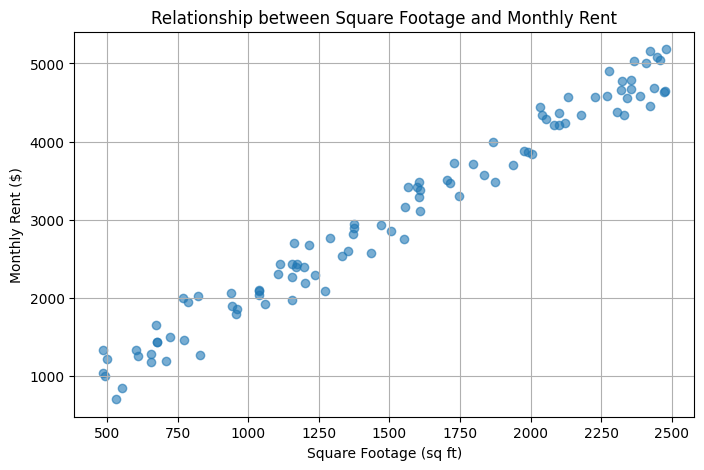

In [4]:
# Step 2: Explore the relationship with a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['square_footage'], df['monthly_rent'], alpha=0.6)
plt.title('Relationship between Square Footage and Monthly Rent')
plt.xlabel('Square Footage (sq ft)')
plt.ylabel('Monthly Rent ($)')
plt.grid(True)
plt.show()


In [5]:
# Step 3: Check if scaling is needed
print("\nSquare Footage range:", (df['square_footage'].min(), df['square_footage'].max()))
# Typically scaling isn't necessary for simple linear regression, but we'll note the range


Square Footage range: (484, 2480)


In [6]:
# Step 4: Prepare data for modeling
X = df[['square_footage']]
y = df['monthly_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficient for square_footage:", model.coef_[0])
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Model Coefficients:
Intercept: 25.721317165930486
Coefficient for square_footage: 2.000317405255954

Model Performance:
Mean Squared Error: 57543.52
R-squared Score: 0.96


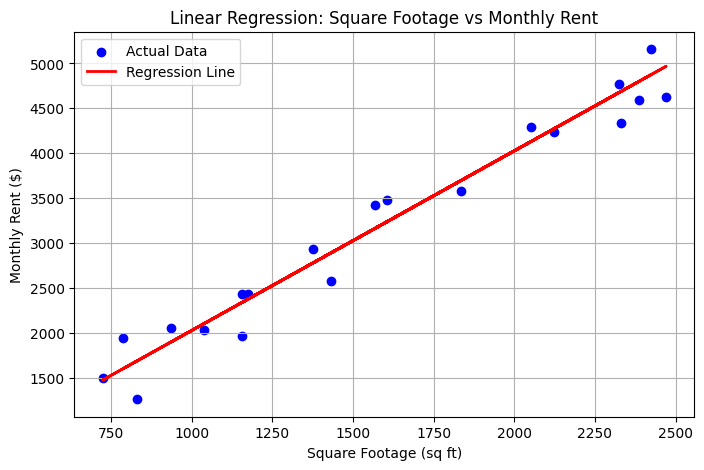

In [8]:
# Step 7: Plot the regression line against data points
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Square Footage vs Monthly Rent')
plt.xlabel('Square Footage (sq ft)')
plt.ylabel('Monthly Rent ($)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Now Predicting rent for a 1000 sq ft apartment
sample_size = 1000
predicted_rent = model.predict([[sample_size]])
print(f"\nPredicted monthly rent for {sample_size} sq ft apartment: ${predicted_rent[0]:.2f}")


Predicted monthly rent for 1000 sq ft apartment: $2026.04


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
